# Diversity of Ideas: Stanford Daily


## Setup


In [1]:
from dotenv import load_dotenv, find_dotenv
load_dotenv(find_dotenv())

True

In [3]:
import pandas as pd
from util.ouraws import (
    getFromFile
)

In [4]:
%pwd

'/Users/pmui/SynologyDrive/research/diversity-ideas/notebooks/2024'

In [39]:
df = getFromFile("../../data/ucdavis-opinions.parquet", False)
df.shape


(1383, 6)

In [40]:
df.iloc[0:20]

,title,url,body,year,month,day
0,ASUCD HAUS hosts Housing Fair on Nov. 13,https://theaggie.org/2024/12/05/asucd-haus-hos...,ASUCD HAUS hosts Housing Fair on Nov. 13\nASUC...,2024,12,1
1,Why I love the musical âHadestownâ,https://theaggie.org/2024/12/10/why-i-love-the...,Why I love the musical âHadestownâ\nWhy I ...,2024,12,1
2,City of Davis unveils new artwork in memory of...,https://theaggie.org/2024/12/10/city-of-davis-...,City of Davis unveils new artwork in memory of...,2024,12,1
3,The Mondavi Center holds performance of Astria...,https://theaggie.org/2024/11/22/the-mondavi-ce...,The Mondavi Center holds performance of Astria...,2024,11,1
4,"Sugar, spice and holiday spirit",https://theaggie.org/2024/12/11/sugar-spice-an...,"Sugar, spice and holiday spirit\nSugar, spice ...",2024,12,1
5,ASUCD Coffee House introduces halal menu optio...,https://theaggie.org/2024/12/06/asucd-coffee-h...,ASUCD Coffee House introduces halal menu optio...,2024,12,1
6,Downtown Davis hosts 2nd Friday ArtAbout,https://theaggie.org/2024/12/10/downtown-davis...,Downtown Davis hosts 2nd Friday ArtAbout\nDown...,2024,12,1
7,What is the Pour Out Pepsi project?,https://theaggie.org/2024/12/09/what-is-the-po...,What is the Pour Out Pepsi project?\nWhat is t...,2024,12,1
8,Davis Media Access produces local election cov...,https://theaggie.org/2024/12/10/davis-media-ac...,Davis Media Access produces local election cov...,2024,12,1
9,Davis Joint Unified School District joins coho...,https://theaggie.org/2024/12/10/davis-joint-un...,Davis Joint Unified School District joins coho...,2024,12,1


In [41]:
df[df.year==2024].count()

title    232
url      232
body     232
year     232
month    232
day      232
dtype: int64

In [42]:
df[df.year==2023].count()

title    240
url      240
body     240
year     240
month    240
day      240
dtype: int64

In [34]:
unique_urls = df.url.unique()

In [35]:
unique_urls.shape

(633,)

In [36]:
unique_urls[0:20]

array(['https://theaggie.org/2024/12/05/asucd-haus-hosts-housing-fair-on-nov-13/',
       'https://theaggie.org/2024/12/10/why-i-love-the-musical-hadestown/',
       'https://theaggie.org/2024/12/10/city-of-davis-unveils-new-artwork-in-memory-of-uc-davis-student-karim-abou-najm/',
       'https://theaggie.org/2024/11/22/the-mondavi-center-holds-performance-of-astria-suparaks-asian-futures-without-asians/',
       'https://theaggie.org/2024/12/11/sugar-spice-and-holiday-spirit/',
       'https://theaggie.org/2024/12/06/asucd-coffee-house-introduces-halal-menu-options-increasing-accessibility/',
       'https://theaggie.org/2024/12/10/downtown-davis-hosts-2nd-friday-artabout/',
       'https://theaggie.org/2024/12/09/what-is-the-pour-out-pepsi-project/',
       'https://theaggie.org/2024/12/10/davis-media-access-produces-local-election-coverage-throughout-election-night/',
       'https://theaggie.org/2024/12/10/davis-joint-unified-school-district-joins-cohort-to-address-housing-affordab

## Function Definitions


In [11]:
import numpy as np
import re

In [12]:
def getCovDispersion(wv):
    N = len(wv)
    cov = np.cov(wv)
    return (N, 
            np.trace(cov)/N, 
            np.linalg.norm(cov, ord=1)/N, 
            np.linalg.norm(cov, ord=2)/N, 
            np.linalg.norm(cov, ord=np.inf)/N, 
            )

def cosine_distance(v1, v2):
    """Calculate the cosine distance between two numpy arrays.
    
    Parameters:
    a (numpy array): First input array.
    b (numpy array): Second input array.
    
    Returns:
    float: Cosine distance between a and b.
    """
    a = np.array(v1, dtype=np.float64)
    b = np.array(v2, dtype=np.float64)
    # Calculate dot product and magnitudes of the input arrays
    dot   = np.dot(a, b)
    a_mag = np.linalg.norm(a)
    b_mag = np.linalg.norm(b)
    
    if np.isclose(a_mag, 0, rtol=1e-9, atol=1e-12):
        print(f"a_mag is very small: {a_mag}")
    if np.isclose(b_mag, 0, rtol=1e-9, atol=1e-12):
        print(f"b_mag is very small: {b_mag}")
    
    # Calculate and return the cosine distance
    return 1.0 - (dot / (a_mag * b_mag))

def getPairwiseDispersion(wv, measure):
    if len(wv) <= 1: return 0.0
    distance = 0.0
    vec = wv[0]
    for v in wv[1:]:
        distance += measure(vec, v)
        # print(f"\tcos_distance: {measure(vec, v)}")
    return distance + getPairwiseDispersion(wv[1:], measure)

def getNormalizedPairwiseDispersion(wv, measure):
    '''Normalize the dispersion by (N-Choose-2) number of pairs'''
    N = len(wv)
    return getPairwiseDispersion(wv, measure) / (N * (N-1)/2.)

In [13]:
diversity_words = [
    'diversity', 
    'equity',
    'inclusion',
    'inclusive',
    'inclusivity',
    'equality', 
    'equal opportunity',
    'social justice',
    'racial justice', 
    'multi-cultural', 
    'multicultural',
    'intercultural',
    'intersectional',
    'intersectionality',
    'anti-discrimination'
]

In [14]:
import nltk
nltk.download('wordnet')
from nltk.stem import WordNetLemmatizer
lemmatizer = WordNetLemmatizer()

[nltk_data] Downloading package wordnet to /Users/pmui/nltk_data...


In [15]:
diversity_lemmas = [lemmatizer.lemmatize(w) for w in diversity_words]
diversity_lemmas

['diversity',
 'equity',
 'inclusion',
 'inclusive',
 'inclusivity',
 'equality',
 'equal opportunity',
 'social justice',
 'racial justice',
 'multi-cultural',
 'multicultural',
 'intercultural',
 'intersectional',
 'intersectionality',
 'anti-discrimination']

In [16]:
diversity_pattern = "|".join(diversity_lemmas)

Let's verify how the "count" of diversity words in the text is calculated.


In [17]:
text = "This is a multicultural organization that advocates for diversity and racial justice."
len(re.findall(diversity_pattern, text))

3

## Analysis


In [25]:
from openai import OpenAI
from typing import List
import numpy as np
client = OpenAI()

In [26]:
def get_embedding(text: str) -> List[float]:
    """
    Get embeddings for a single text using text-embedding-3-large model.
    
    Args:
        text (str): The input text to generate embeddings for
        
    Returns:
        List[float]: The embedding vector
    """
    response = client.embeddings.create(
        model="text-embedding-3-large",
        input=text,
        dimensions=1024  # Optional: You can specify 256, 512, or 1024 dimensions
    )
    return response.data[0].embedding

def get_batch_embeddings(texts: List[str]) -> List[List[float]]:
    """
    Get embeddings for multiple texts in a single API call.
    
    Args:
        texts (List[str]): List of input texts to generate embeddings for
        
    Returns:
        List[List[float]]: List of embedding vectors
    """
    response = client.embeddings.create(
        model="text-embedding-3-large",
        input=texts,
        dimensions=1024
    )
    return [item.embedding for item in response.data]

In [20]:
nltk.download('stopwords')
from nltk.corpus import stopwords

[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\theod\AppData\Roaming\nltk_data...
[nltk_data]   Unzipping corpora\stopwords.zip.


In [23]:
english_stopwords = stopwords.words('english')
def prepText(text_series):
    # Step 1: Clean and normalize each text in the series
    # - Convert to lowercase
    # - Lemmatize each word (convert to base form)
    # - Remove stopwords
    # - Join words back together with spaces
    text_series = text_series.apply(
        lambda x: " ".join(lemmatizer.lemmatize(w.lower()) for w in x.split()
                           if w not in english_stopwords))
    
    # Step 2: Filter out short texts
    # Remove any text less than 100 characters as they're likely too short for meaningful analysis
    text_series = text_series.apply(lambda x: x if len(x) > 100 else None)
    
    # Step 3: Remove any null values created by the previous step
    text_series = text_series.dropna()
    
    # Step 4: Count diversity-related terms
    # Sum up all instances of diversity-related words (defined in diversity_pattern)
    # across all remaining texts in the series
    total_diversity_words = sum([len(re.findall(diversity_pattern, text))
                                for text in text_series])
    
    # Return both the cleaned text series and the total count of diversity words
    return text_series, total_diversity_words

In [22]:
START_YEAR = 2009
FINAL_YEAR = 2024

In [39]:
year_2024 = df[df.year==2024]
clean_df, num_diversity_words = prepText(year_2024.body)
wv = get_batch_embeddings(clean_df)

In [40]:
type(wv[0])

list

In [41]:
docmatrix = np.array(wv)

In [42]:
docmatrix.shape

(76, 1024)

In [43]:
pairwise = getNormalizedPairwiseDispersion(docmatrix, cosine_distance)
cov = getCovDispersion(docmatrix)
print(f"{year_2024.year}, {cov[0]}, {cov[1]}, {pairwise}")

0     2024
1     2024
2     2024
3     2024
4     2024
      ... 
87    2024
88    2024
89    2024
90    2024
92    2024
Name: year, Length: 92, dtype: int64, 76, 0.0009767977206754375, 0.6101443659097303


In [46]:
pairwise

np.float64(0.6101443659097303)

In [48]:
results = []
for year in range(START_YEAR, FINAL_YEAR+1):
    year_df = df[df.year==year]
    
    clean_df, num_diversity_words = prepText(year_df.body)
    wv = get_batch_embeddings(clean_df)
    
    docmatrix = np.array(wv)
    pairwise = getNormalizedPairwiseDispersion(docmatrix, cosine_distance)
    cov = getCovDispersion(docmatrix)
    
    print(f"{year}, {cov[0]}, {cov[1]}, {pairwise}")
    
    result = {'year':     year,
              'pairwise': pairwise,
              'size':     cov[0],
              'trace':    cov[1],
              'norm-1':   cov[2],
              'norm-2':   cov[3],
              'norm-inf': cov[4],
              'diversity-words': num_diversity_words,
              'mentions-norm'  : num_diversity_words/cov[0]
             }
    results.append(result)

2010, 207, 0.0009766167529257528, 0.710117609253947
2011, 137, 0.0009764351481756196, 0.691698461540798
2012, 50, 0.0009765038000803339, 0.7340484930269797
2013, 32, 0.0009767196582094692, 0.7288891552899476
2014, 62, 0.0009762535832494066, 0.7517017518629402
2015, 68, 0.0009765484908662701, 0.7854083415700241
2016, 44, 0.0009768170595227004, 0.7256327685276032
2017, 66, 0.0009766271014865627, 0.7204981588265513
2018, 55, 0.0009765945796641122, 0.7137747186853997
2019, 101, 0.0009766752379632676, 0.6856552164286303
2020, 166, 0.000976908599291372, 0.6676190211067815
2021, 116, 0.000976805132593736, 0.629022644128942
2022, 91, 0.0009766618564848355, 0.6207468741951117
2023, 84, 0.0009768738630224667, 0.5744711206405287
2024, 76, 0.000976801742053257, 0.610024948155727


In [49]:
results_df = pd.DataFrame.from_records(results)
results_df.set_index('year')

,pairwise,size,trace,norm-1,norm-2,norm-inf,diversity-words,mentions-norm
year,,,,,,,,
2010,0.710118,207,0.000977,0.000372,0.000290,0.000372,2,0.009662
2011,0.691698,137,0.000976,0.000412,0.000310,0.000412,4,0.029197
2012,0.734048,50,0.000977,0.000372,0.000283,0.000372,0,0.000000
2013,0.728889,32,0.000977,0.000355,0.000297,0.000355,2,0.062500
2014,0.751702,62,0.000976,0.000331,0.000260,0.000331,4,0.064516
2015,0.785408,68,0.000977,0.000289,0.000226,0.000289,0,0.000000
2016,0.725633,44,0.000977,0.000389,0.000297,0.000389,4,0.090909
2017,0.720498,66,0.000977,0.000388,0.000300,0.000388,4,0.060606
2018,0.713775,55,0.000977,0.000394,0.000305,0.000394,0,0.000000


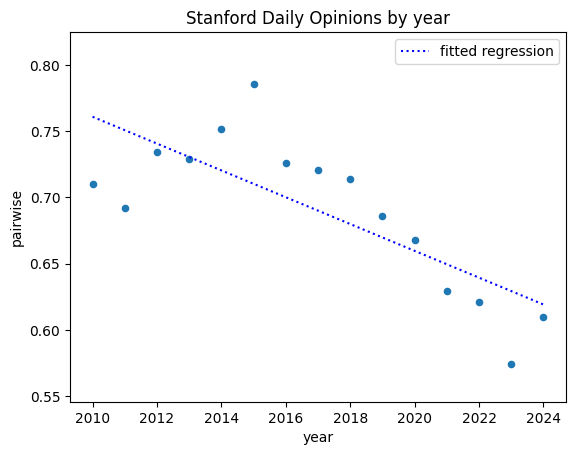

In [51]:
import matplotlib.pyplot as plt
from scipy.stats import linregress

x = results_df['year']
y = results_df['pairwise']

slope, intercept, r_value, p_value, std_err = linregress(x, y)

results_df.plot(x="year", y="pairwise", kind="scatter")

plt.plot(x, intercept + slope*x, 'b:', label='fitted regression')

plt.title("Stanford Daily Opinions by year")
plt.legend(loc='upper right')
plt.ylim(min(y)*0.95, max(y)*1.05)
plt.show()

mentions-norm slope:0.00168, int:0.02862, r:0.19620, p:0.48342, se:0.00232, x:range(0, 15)
pairwise slope:-0.01012, int:0.76079, r:-0.77043, p:0.00078, se:0.00232, x:range(0, 15)


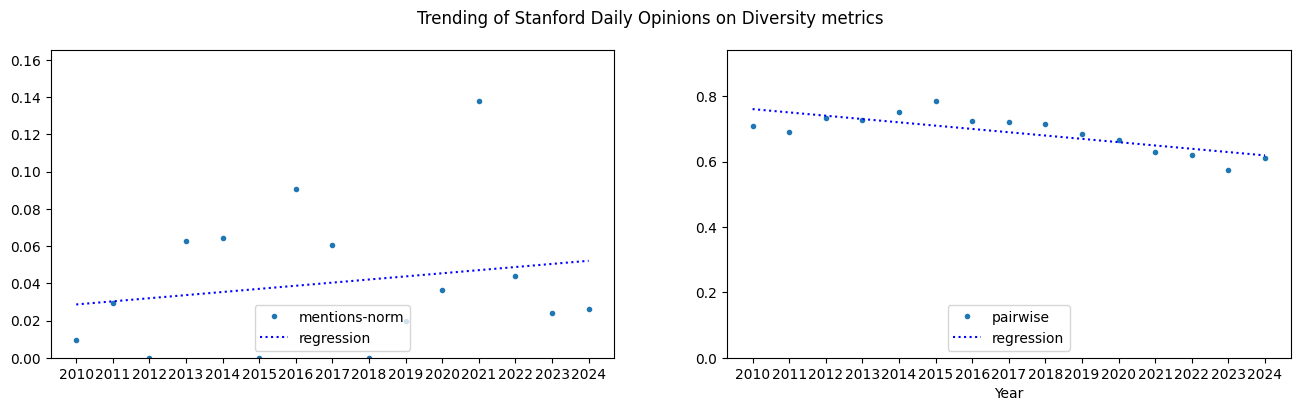

In [52]:
# Select the columns to plot
columns = ["mentions-norm", "pairwise"]

# Create a figure with subplots
fig, axs = plt.subplots(nrows=1, ncols=len(columns), sharex=True, figsize=(16,4))

# Loop through the columns and plot each one
for ax, column in zip(axs, columns):
    # Select the data for the current column
    x = range(len(results_df.index))
    y = results_df[column]
     
    # Calculate the linear regression
    slope, intercept, r_value, p_value, std_err = linregress(x, y)
    
    print("{} slope:{:.5f}, int:{:.5f}, r:{:.5f}, p:{:.5f}, se:{:.5f}, x:{}".format(
            column, slope, intercept, r_value, p_value, std_err, x))

    # Plot the data and the linear regression line
    results_df[column].plot(ax=ax, style=".", x=x, y=y, label=column)
    ax.plot(x, intercept + slope*x, 'b:', label='regression')
    ax.set_ylim(0, max(y)*1.2)
    
    # Add a legend
    ax.legend(loc='lower center')

    # Add x-label for the years
    ax.set_xticks(results_df.index)
    ax.set_xticklabels(results_df.year)
 
    # Add a title
    # ax.set_title(f"Trending of {column} in Liberty University's Champion")
    
plt.xlabel("Year")
plt.suptitle("Trending of Stanford Daily Opinions on Diversity metrics")
plt.show()